In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfData = pd.read_csv('ex1data1.txt', names =['Population','Profit'])
dfFeatures = dfData['Population']
dfTarget = dfData['Profit']
dfData.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0,0.5,'Profit in $10,000s')

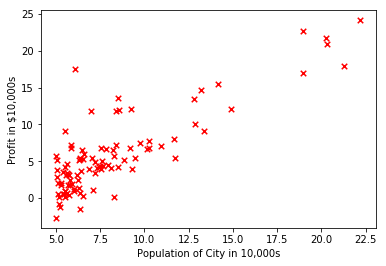

In [3]:
'''
Convert dataframes to matrices so that we can use numpy.
'''
X = np.matrix(dfFeatures).T
y = np.matrix(dfTarget).T
'''
Plot data.
'''
plt.scatter([X[:,0]],[y[:,0]], s = 30, c = 'r', marker = 'x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [4]:
def addBiasColumn(X):
    # Add a ones column for the bias terms.
    intNumSamples = X.shape[0]
    onesColumn = np.ones(shape = (intNumSamples,1))
    newX = np.concatenate([onesColumn,X],axis =1)
    return newX
'''
Add intercept.
'''
X = addBiasColumn(X)

In [5]:
def computeCost(X,y,theta,lambdafactor=0):
    intNumSamples = y.shape[0]
    hypothesis = np.dot(X,theta)
    #   Unregularized cost function.
    J = np.sum(np.square(hypothesis -y))/2/intNumSamples
    '''
    #   Regularization term.  Don't square theta0.
    R = lambdafactor*np.sum(np.square(theta[1:,0]))

    #   Regularized cost function.
    J += R
    '''
    return J

In [6]:
'''
Test cost function.  Output should be ~32.07 when theta vector is 0.
'''
theta = np.matrix(np.zeros((X.shape[1],1)))

cost = computeCost(X,y,theta)
print('Estimated cost: 32.07\nCalculated cost: %s\n' %(cost))

cost = computeCost(X,y,np.array([[-1],[2]]))
print('Estimated cost: 52.24\nCalculated cost: %s' %(cost))

Estimated cost: 32.07
Calculated cost: 32.072733877455676

Estimated cost: 52.24
Calculated cost: 54.24245508201238


In [7]:
def gradientDescent(X,y,theta,learningRate = 0.01,intIterations = 100):
    intNumSamples,intNumFeatures = X.shape
    tempTheta = np.copy(theta)
    costHistory = np.zeros((intIterations,1))
    
    for i in range(0,intIterations):
        error = np.dot(X,theta) - y
        tempTheta = theta - np.dot(X.T,error)*learningRate/intNumSamples
        theta = np.copy(tempTheta)
        costHistory[i,0] = computeCost(X,y,theta)
    return theta, costHistory

In [8]:
def normEqn(X,y,regularized = False, lambdafactor = 0):
    if regularized:
        regIdentity = lambdafactor * np.eye(X.shape[1])
        regIdentity[0,0] = 0
        calculatedTheta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X) - regIdentity),X.T),y)
    else:
        calculatedTheta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return calculatedTheta

Theta calculated using gradient descent:
[[-3.63029144]
 [ 1.16636235]]
Theta calculated using normal equation:
[[-3.89578088]
 [ 1.19303364]]


Text(0,0.5,'Cost Function J')

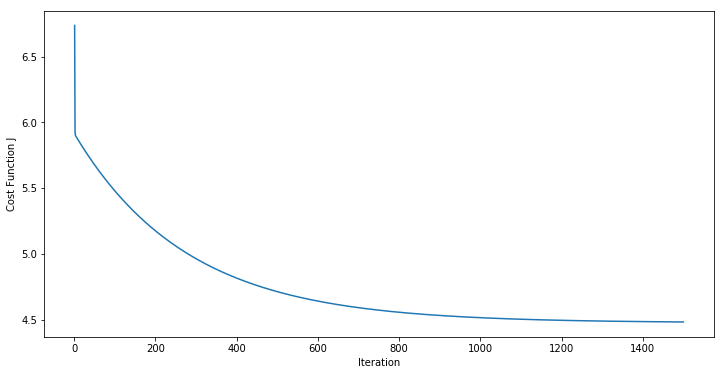

In [9]:
'''
Run gradient descent to minimize cost function.
'''
intIterations = 1500
learningRate = 0.01
calculatedTheta, costHistory = gradientDescent(X,y,theta,learningRate,intIterations)
'''
Also calculate theta using normal equation
'''
calculatedTheta2 = normEqn(X,y)
print('Theta calculated using gradient descent:\n%s' %(calculatedTheta))
print('Theta calculated using normal equation:\n%s' %(calculatedTheta2))
'''
Plot cost function history.
'''
xValues = np.arange(1,intIterations+1)
fig, axes = plt.subplots(figsize =(12,6))
axes.plot(xValues,costHistory)
axes.set_xlabel('Iteration')
axes.set_ylabel('Cost Function J')

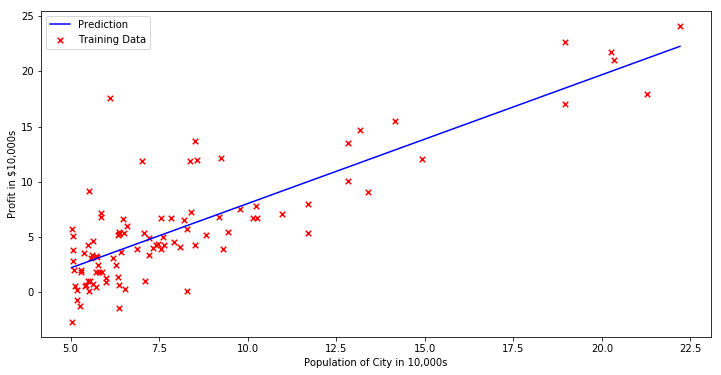

In [10]:
'''
Plot line.
'''
xValues = np.linspace(dfFeatures.min(),dfFeatures.max(),100)
estimatedProfit = calculatedTheta[0,0]+np.dot(xValues,calculatedTheta[1,0])

fig, axes = plt.subplots(figsize =(12,6))

axes.scatter(dfFeatures,dfTarget,s = 30, c = 'r', marker = 'x',label ='Training Data')
axes.plot(xValues, estimatedProfit,c = 'b',label = 'Prediction')

axes.set_xlabel('Population of City in 10,000s')
axes.set_ylabel('Profit in $10,000s')
axes.legend()